In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report , accuracy_score


In [5]:
path ="IRIS.csv"
df = pd.read_csv(path)
df.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [6]:
df.shape

(150, 5)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [10]:
df.duplicated().sum()


np.int64(3)

In [14]:
df.drop_duplicates(inplace=True)

In [27]:
df.duplicated().sum()

np.int64(0)

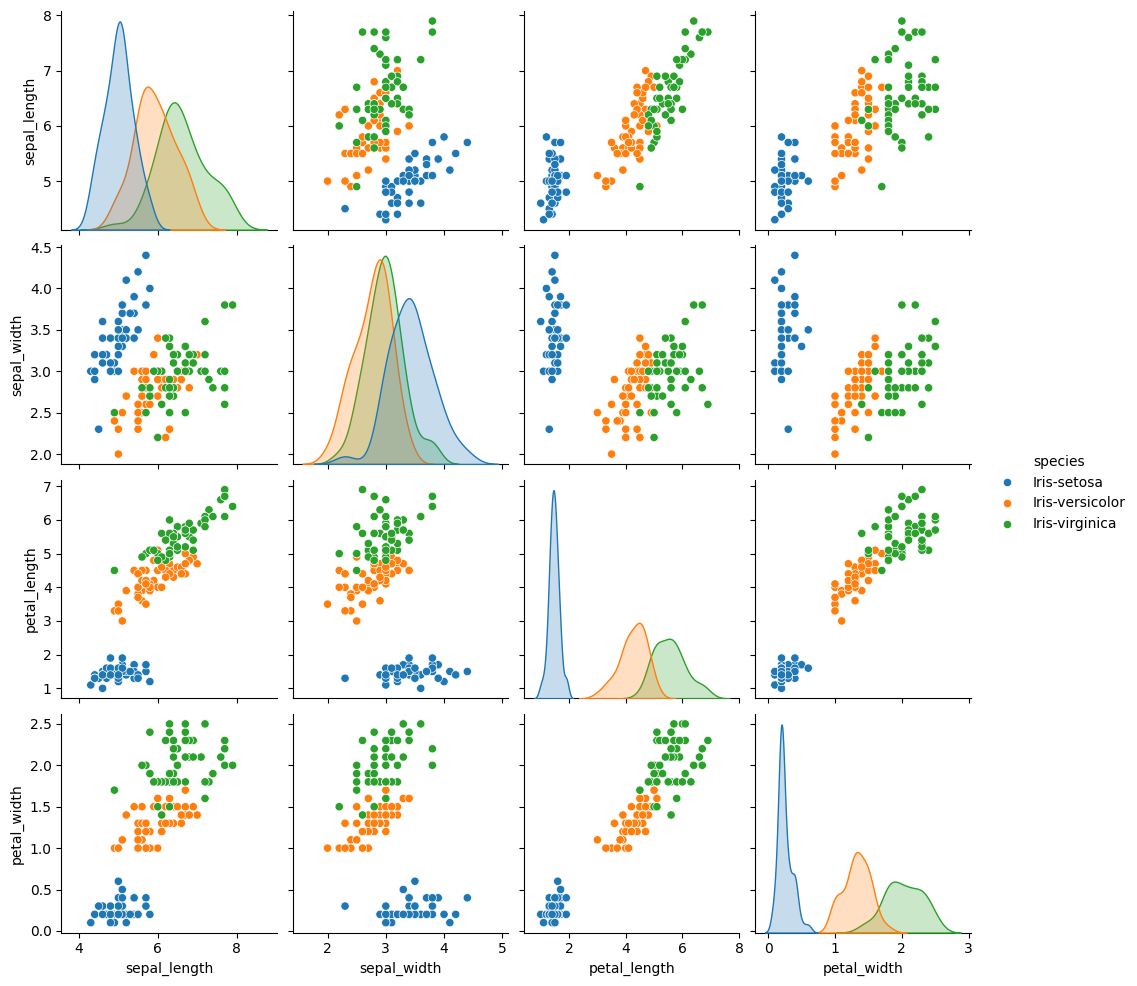

In [15]:
sns.pairplot(df , hue='species')

(array([ 4.,  5.,  7., 14.,  9.,  5., 13., 14.,  9.,  6., 10., 16.,  7.,
        11.,  4.,  2.,  4.,  1.,  5.,  1.]),
 array([4.3 , 4.48, 4.66, 4.84, 5.02, 5.2 , 5.38, 5.56, 5.74, 5.92, 6.1 ,
        6.28, 6.46, 6.64, 6.82, 7.  , 7.18, 7.36, 7.54, 7.72, 7.9 ]),
 <BarContainer object of 20 artists>)

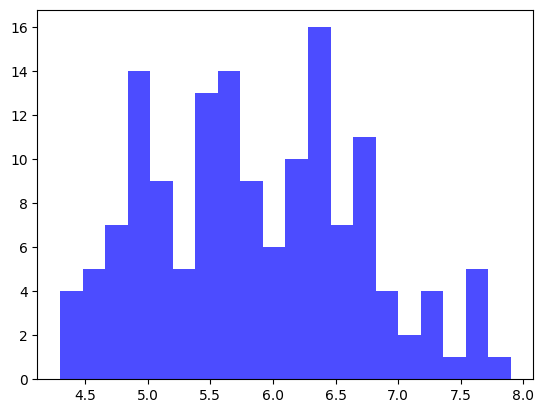

In [26]:
plt.hist(df['sepal_length'], bins = 20 ,color = 'blue', alpha = 0.7)

In [28]:
X = df.drop('species', axis = 1)
y = df['species']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
print("X train shape:", X_train.shape)
print("X test shape:", X_test.shape)

X train shape: (117, 4)
X test shape: (30, 4)


In [36]:
knn = KNeighborsClassifier(n_neighbors=5)

In [37]:
knn.fit(X_train , y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [43]:
y_pred = knn.predict(X_test)
result = accuracy_score(y_test ,y_pred)
print("Accuracy Score:", result)

Accuracy Score: 0.9333333333333333


In [44]:
print(classification_report(y_test ,y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.90      0.90      0.90        10
 Iris-virginica       0.89      0.89      0.89         9

       accuracy                           0.93        30
      macro avg       0.93      0.93      0.93        30
   weighted avg       0.93      0.93      0.93        30



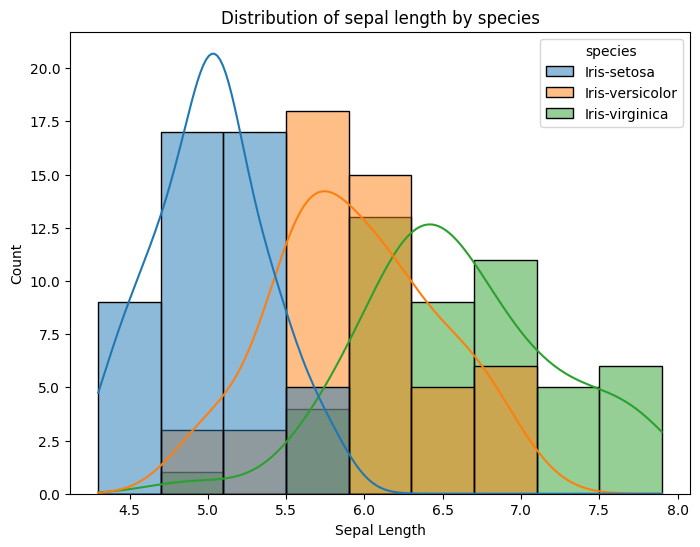

In [48]:
plt.figure(figsize=(8 , 6))
sns.histplot(data = df , x= 'sepal_length', hue = 'species', kde = True)
plt.xlabel("Sepal Length")
plt.title("Distribution of sepal length by species")
plt.show()